In [6]:
import IPython.display as ipd
ipd.Audio('./Bombastik.mp3')
#TW staff - my 2 cents appears in the comments, appropriately enough

# About Me

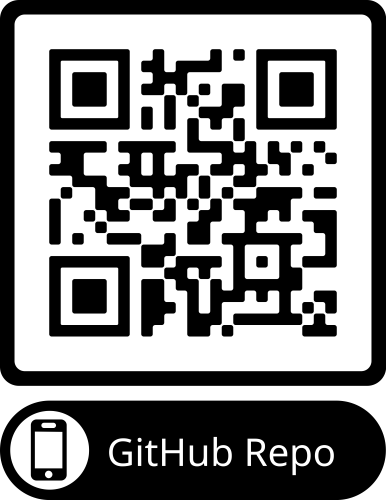

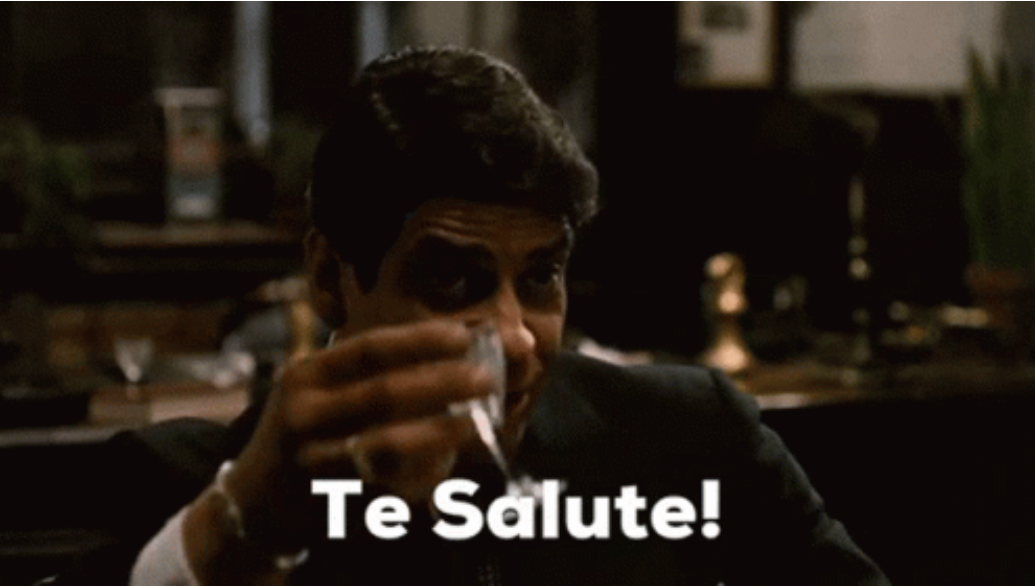

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# I kept up well with the pace in courses 1 and 2.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
# the format changes in course3 threw me for a loop, although in the end I kind of liked that I had options and I used them.  Thanks!
# the most difficult thing about course3 was that I took ML and not webDev in course2.
# it made it hard to get good value from the lecture time

df = pd.read_csv('./dataset.csv')
df.shape

(4424, 35)

In [ ]:
df.isna().sum(), df.isnull().sum()

(Marital status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance                        0
 Previous qualification                            0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                            0
 Scholarship holder                                0
 Age at enrollment                                 0
 International                                

K-nearest Neighbors (KNN), optimized baseline: approx. 70% accurate

In [ ]:
features = df.drop('Target', axis=1)
target = df['Target']
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=.2, random_state=0)

knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
# I wish more of my classmates were more collegial and relaxed in lectures
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

print(f"Train acc: {round(accuracy_score(y_train, y_train_pred), 3)}")
print(f"Test acc:  {round(accuracy_score(y_test, y_test_pred), 3)}")

Train acc: 0.711
Test acc:  0.702


Decision Tree model, optimized baseline: approx. 77%

In [ ]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(X_train, y_train)
# I appreciated the forgiving nature and tone of the program's staff & instructors
# it made me feel I was never out of it

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)}")


Training Accuracy: 0.7680135631534332
Testing Accuracy: 0.7672316384180791


Support Vector Machines (SVM) model, optimized baseline for kernel rbf

In [ ]:
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)

train_preds = svc_model.predict(X_train)
test_preds = svc_model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)}")

Train Accuracy: 0.7578411980785532
Test Accuracy: 0.7457627118644068


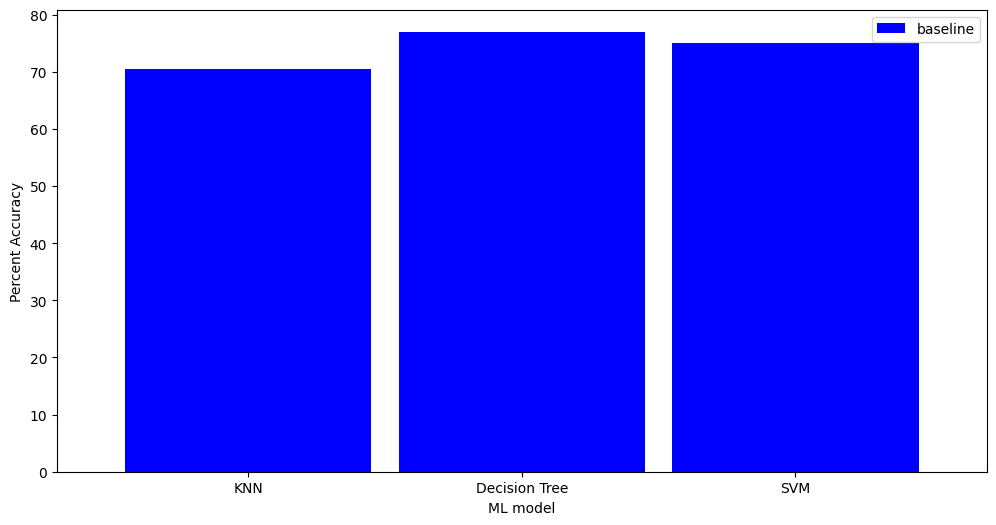

In [ ]:
chart_df = pd.DataFrame(
    {'ML model': ['KNN', 'Decision Tree', 'SVM'],
    'baseline':[70.5, 77, 75],
    #'scaling':[2.5, .1, 2.5],
    #'feature engineering':[2, .4, .1],
    #'after the 75 senators\'s sons scandal':[1.5, 1, 2.4]
})

fig, ax = plt.subplots(figsize=(12,6))
chart_df.plot(x='ML model', rot='horizontal', ylabel='Percent Accuracy', kind='bar', width=.9, stacked=True, ax=ax, color=['blue', 'red', 'green'])
plt.show()



# Scaling

In [ ]:
features = StandardScaler().fit_transform(features)
features_normalized = pd.DataFrame(features, columns=df.drop('Target', axis=1).columns)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(features_normalized, target, stratify=target, test_size=.2, random_state=0)

KNN model improved from approx. 70.5% to 73%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_normalized, y_train_normalized)

y_train_pred = knn_model.predict(X_train_normalized)
y_test_pred = knn_model.predict(X_test_normalized)

print(f"Train acc: {round(accuracy_score(y_train_normalized, y_train_pred), 3)}")
print(f"Test acc:  {round(accuracy_score(y_test_normalized, y_test_pred), 3)}")

Train acc: 0.735
Test acc:  0.724


Decision Tree was largely unaffected by our scaling

In [ ]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(X_train_normalized, y_train_normalized)

train_pred = model.predict(X_train_normalized)
test_pred = model.predict(X_test_normalized)

print(f"Training Accuracy: {accuracy_score(y_train_normalized, train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test_normalized, test_pred)}")

Training Accuracy: 0.7680135631534332
Testing Accuracy: 0.7672316384180791


SVM improved about 2.5% (with a kernel switch)

In [ ]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_normalized, y_train_normalized)

train_preds = svc_model.predict(X_train_normalized)
test_preds = svc_model.predict(X_test_normalized)

print(f"Train Accuracy: {accuracy_score(y_train_normalized, train_preds)}")
print(f"Test Accuracy: {accuracy_score(y_test_normalized, test_preds)}")

Train Accuracy: 0.7756428369595931
Test Accuracy: 0.7774011299435029


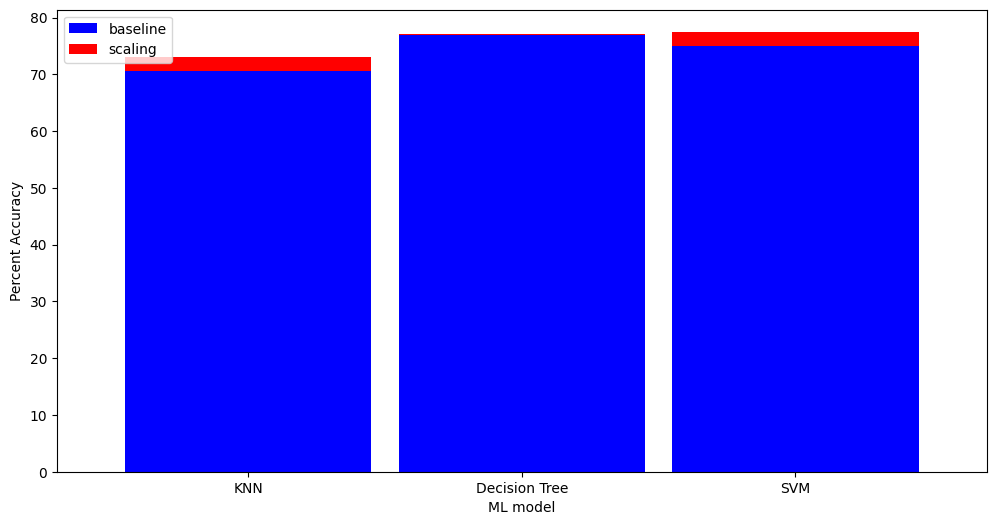

In [ ]:
chart_df = pd.DataFrame(
    {'ML model': ['KNN', 'Decision Tree', 'SVM'],
    'baseline':[70.5, 77, 75],
    'scaling':[2.5, .1, 2.5],
    #'feature engineering':[2, .4, .1],
    #'after the 75 senators\'s sons scandal':[1.5, 1, 2.4]
    # I learnt the most easily from Felipe.  Not sure why
    # Every once in a while I struggled with his accent
    # but then I realized the auto-caption was so far off sometimes in
    # what it thought Felipe said, that it actually confused ME
    # But when I ignored the captions, and just listened, I could
    # understand almost perfectly
})

fig, ax = plt.subplots(figsize=(12,6))
chart_df.plot(x='ML model', rot='horizontal', ylabel='Percent Accuracy', kind='bar', width=.9, stacked=True, ax=ax, color=['blue', 'red', 'green'])
plt.show()

# Feature Engineering

GPA feature

In [ ]:
df = pd.read_csv('./dataset.csv')
GPA_1 = df['Curricular units 1st sem (grade)']/df['Curricular units 1st sem (enrolled)']
GPA_2 = df['Curricular units 2nd sem (grade)']/df['Curricular units 2nd sem (enrolled)']
# I think it's difficult to overstate the importance of the voices we hear here
# I for one rewound the videos *A LOT*
# sometimes the same 10-15 second clip, over and over
# I noticed how deeply familiar some phrases or conversation was when I watched
# weeks later (after my initial rewinding).  Some of those phrases worked their
# way into long or medium-term memory
df['GPA_1'] = GPA_1
df['GPA_2'] = GPA_2

Grade Improvement feature

In [ ]:
df['GPA_difference'] = df['GPA_1'] - df['GPA_2']

Credits over/under feature

In [ ]:
df['credits_over_under_sem_1'] = df['Curricular units 1st sem (approved)'] - df['Curricular units 1st sem (enrolled)']
df['credits_over_under_sem_2'] = df['Curricular units 2nd sem (approved)'] - df['Curricular units 2nd sem (enrolled)']

Fixing the nulls my GPA feature introduced into the set.

In [ ]:
df['GPA_1'].fillna(0, inplace=True)
df['GPA_2'].fillna(0, inplace=True)
df['GPA_difference'].fillna(0, inplace=True)

In [ ]:
features = df.drop('Target', axis=1)
target = df['Target']
# Nick's voice and style were load and clear
# when I rewound him, it was often because I wanted to hear the brief
# plug or reference he made to some tangential idea, or even the word he chose
features = StandardScaler().fit_transform(features)
features_normalized = pd.DataFrame(features, columns=df.drop('Target', axis=1).columns)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(features_normalized, target, stratify=target, test_size=.2, random_state=0)

With our new features, the KNN model improved by approx. 2%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_normalized, y_train_normalized)

y_train_pred = knn_model.predict(X_train_normalized)
y_test_pred = knn_model.predict(X_test_normalized)
# I could hear Sarah getting better at her job, quickly
# Thanks for all your help, on so many sundry issues
# It really helped that I could trust in your ability
# Gave me confidence and lowered the stress level

print(f"Train acc: {round(accuracy_score(y_train_normalized, y_train_pred), 3)}")
print(f"Test acc:  {round(accuracy_score(y_test_normalized, y_test_pred), 3)}")

Train acc: 0.753
Test acc:  0.747


Decision Tree's accuracy was largely unaffected (improved maybe half a percentage point).  Note that k changed from 5 to 4.

In [ ]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(X_train_normalized, y_train_normalized)

train_pred = model.predict(X_train_normalized)
test_pred = model.predict(X_test_normalized)

print(f"Training Accuracy: {accuracy_score(y_train_normalized, train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test_normalized, test_pred)}")

Training Accuracy: 0.7654704718847132
Testing Accuracy: 0.7796610169491526


In [ ]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_normalized, y_train_normalized)

train_preds = svc_model.predict(X_train_normalized)
test_preds = svc_model.predict(X_test_normalized)

print(f"Train Accuracy: {accuracy_score(y_train_normalized, train_preds)}")
print(f"Test Accuracy: {accuracy_score(y_test_normalized, test_preds)}")

Train Accuracy: 0.7812941508900819
Test Accuracy: 0.7728813559322034


In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:

    svc_model = SVC(kernel=kernel, random_state=42)
    svc_model.fit(X_train_normalized, y_train_normalized)

    train_preds = svc_model.predict(X_train_normalized)
    test_preds = svc_model.predict(X_test_normalized)
    # the career services TW provides seem like they're amazing
    # I underutilized them, but I'm going to change that if I can
    # hopefully you'll let me avail myself of them now that I'm graduating

    print("*"*50)
    print(f"Kernel: {kernel}")
    print(f"Train Accuracy: {accuracy_score(y_train_normalized, train_preds)}")
    print(f"Test Accuracy: {accuracy_score(y_test_normalized, test_preds)}")


**************************************************
Kernel: linear
Train Accuracy: 0.7812941508900819
Test Accuracy: 0.7728813559322034
**************************************************
Kernel: rbf
Train Accuracy: 0.8265046623339927
Test Accuracy: 0.7796610169491526
**************************************************
Kernel: poly
Train Accuracy: 0.7948573043232552
Test Accuracy: 0.7333333333333333
**************************************************
Kernel: sigmoid
Train Accuracy: 0.6897428652161628
Test Accuracy: 0.6892655367231638


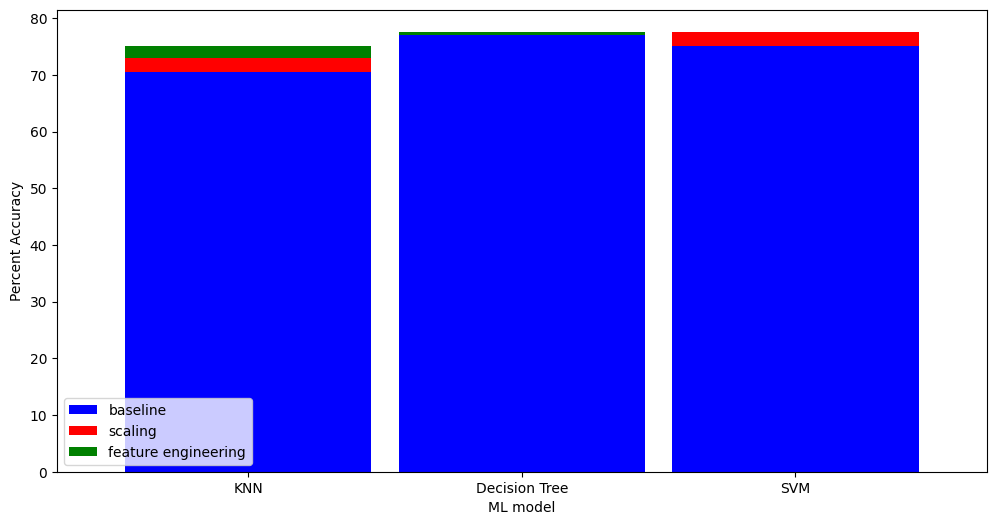

In [ ]:
chart_df = pd.DataFrame(
    {'ML model': ['KNN', 'Decision Tree', 'SVM'],
    'baseline':[70.5, 77, 75],
    'scaling':[2.5, .1, 2.5],
    'feature engineering':[2, .4, .1],
    #'after the 75 senators\'s sons scandal':[1.5, 1, 2.4]
})

fig, ax = plt.subplots(figsize=(12,6))
chart_df.plot(x='ML model', rot='horizontal', ylabel='Percent Accuracy', kind='bar', width=.9, stacked=True, ax=ax, color=['blue', 'red', 'green'])
plt.show()

# Deeper Cleaning

See the 0, 180 row below?  It means 180 people got a 0 for the first semester and were also enrolled in 0 credits!  Of those, 77 graduated (somehow).  Or were designated as such.  Turns out, only 2 of those 77 got a non-zero GPA in semester 2.  I believe those may have graduated.  But the other 75, I'm labelling as 'Dropout' instead of 'Graduated.'

In [ ]:
df.loc[df['Curricular units 1st sem (grade)'] == 0.00, 'Curricular units 1st sem (enrolled)'].value_counts()

Curricular units 1st sem (enrolled)
6    218
5    214
0    180
7     64
4     19
1      7
8      7
3      5
2      4
Name: count, dtype: int64

In [ ]:
df_graduate = df[df['Target']=='Graduate']
df_sem_1_grade_zero=df_graduate.loc[df_graduate['Curricular units 1st sem (grade)']==0.00]
g1_zeros = df_sem_1_grade_zero.index.tolist()
df_sem_2_grade_zero=df_graduate.loc[df_graduate['Curricular units 2nd sem (grade)']==0.00]
g2_zeros = df_sem_2_grade_zero.index.tolist()

In [ ]:
len(g1_zeros), len(g2_zeros)

(77, 75)

In [ ]:
g2_zeros

[20,
 66,
 101,
 405,
 527,
 534,
 557,
 574,
 679,
 722,
 728,
 789,
 821,
 869,
 881,
 1002,
 1050,
 1192,
 1302,
 1350,
 1363,
 1377,
 1425,
 1507,
 1512,
 1575,
 1585,
 1600,
 1658,
 1751,
 1883,
 1889,
 1890,
 1898,
 2008,
 2026,
 2124,
 2143,
 2175,
 2194,
 2230,
 2235,
 2328,
 2356,
 2371,
 2387,
 2406,
 2496,
 2508,
 2637,
 2656,
 2793,
 2814,
 2899,
 2920,
 2955,
 3023,
 3024,
 3135,
 3160,
 3317,
 3405,
 3447,
 3481,
 3683,
 3707,
 3717,
 3732,
 3745,
 3928,
 3946,
 4291,
 4353,
 4365,
 4370]

In [ ]:
for i in g2_zeros:
    df.loc[i, 'Target'] = 'Dropout'

In [ ]:
df.loc[[1350]]

Marital status  Application mode  Application order  Course  \
1350               1                 1                  1       2   

      Daytime/evening attendance  Previous qualification  Nacionality  \
1350                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
1350                       1                       1                    4   

      ...  Curricular units 2nd sem (without evaluations)  Unemployment rate  \
1350  ...                                               0               10.8   

      Inflation rate   GDP   Target  GPA_1  GPA_2  GPA_difference  \
1350             1.4  1.74  Dropout    0.0    0.0             0.0   

      credits_over_under_sem_1  credits_over_under_sem_2  
1350                         0                         0  

[1 rows x 40 columns]

In [ ]:
df_graduate = df[df['Target']=='Graduate']
df_sem_1_grade_zero=df_graduate.loc[df_graduate['Curricular units 1st sem (grade)']==0.00]
g1_zeros = df_sem_1_grade_zero.index.tolist()
df_sem_2_grade_zero=df_graduate.loc[df_graduate['Curricular units 2nd sem (grade)']==0.00]
g2_zeros = df_sem_2_grade_zero.index.tolist()

In [ ]:
len(g1_zeros), len(g2_zeros)

(2, 0)

In [ ]:
features = df.drop('Target', axis=1)
target = df['Target']
# I didn't work much with Austin, but I think he'd be fun to work with
features = StandardScaler().fit_transform(features)
features_normalized = pd.DataFrame(features, columns=df.drop('Target', axis=1).columns)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(features_normalized, target, stratify=target, test_size=.2, random_state=0)

Re-classifying those 75 students as 'Dropout' improved the KNN model's accuracy by 1.2%.  Note the slightly different k.  It used to be 20.  Now it's 18.  

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_train_normalized, y_train_normalized)

y_train_pred = knn_model.predict(X_train_normalized)
y_test_pred = knn_model.predict(X_test_normalized)
# I sometimes felt like I was letting Jason down by not matching
# his level of enthusiasm.  I appreciate that he HAD that enthusiasm, though...

print(f"Train acc: {round(accuracy_score(y_train_normalized, y_train_pred), 3)}")
print(f"Test acc:  {round(accuracy_score(y_test_normalized, y_test_pred), 3)}")

Train acc: 0.761
Test acc:  0.764


Decision Tree improved approximately 1%.  K changed again.

In [ ]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(X_train_normalized, y_train_normalized)

train_pred = model.predict(X_train_normalized)
test_pred = model.predict(X_test_normalized)
# I really think my ML instructor did a great job in course2
# we covered a lot of ground, but I somehow absorbed a lot of little stuff
# I was able to either remember or rewind the videos to help with
# both of my ML projects

print(f"Training Accuracy: {accuracy_score(y_train_normalized, train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test_normalized, test_pred)}")

Training Accuracy: 0.7821418479796552
Testing Accuracy: 0.7875706214689265


The SVM model improved the most.  Linear would still be the safest kernel to choose to avoid overfitting.  But even that improved by 2.3%!!

In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:

    svc_model = SVC(kernel=kernel, random_state=42)
    svc_model.fit(X_train_normalized, y_train_normalized)

    train_preds = svc_model.predict(X_train_normalized)
    test_preds = svc_model.predict(X_test_normalized)

    # A moth walks into a dentist's office.
    # "What seems to be the problem, Mr. Moth," asked the dentist
    # The moth said:  "well, doc, where do I start?
    # My wife hates me, even though we've been together for 15 years
    # I think the kids don't respect me, my boss doesn't like me
    # I'm always afraid I'll get fired, and I really need this job
    # Kids yell obscenities at me in the street sometimes
    # On the way over here, I almost flew into a spider web
    # I have gum on my shoe, one wing is longer than the other, I...""
    # "Whoa, whoa, whoa, Mr. Moth," the dentist says.  "I'm sorry about all that,
    # but I'm a DENTIST.  I don't see how I could help you with all of that.
    # why not go to a Psychiatrist?  Why'd you come to see ME??"
    # "Oh," said the moth.  "Your light was on."

    print("*"*50)
    print(f"Kernel: {kernel}")
    print(f"Train Accuracy: {accuracy_score(y_train_normalized, train_preds)}")
    print(f"Test Accuracy: {accuracy_score(y_test_normalized, test_preds)}")

**************************************************
Kernel: linear
Train Accuracy: 0.7846849392483752
Test Accuracy: 0.8135593220338984
**************************************************
Kernel: rbf
Train Accuracy: 0.8310257134783837
Test Accuracy: 0.7988700564971751
**************************************************
Kernel: poly
Train Accuracy: 0.7962701328058773
Test Accuracy: 0.7672316384180791
**************************************************
Kernel: sigmoid
Train Accuracy: 0.6931336535744561
Test Accuracy: 0.7186440677966102


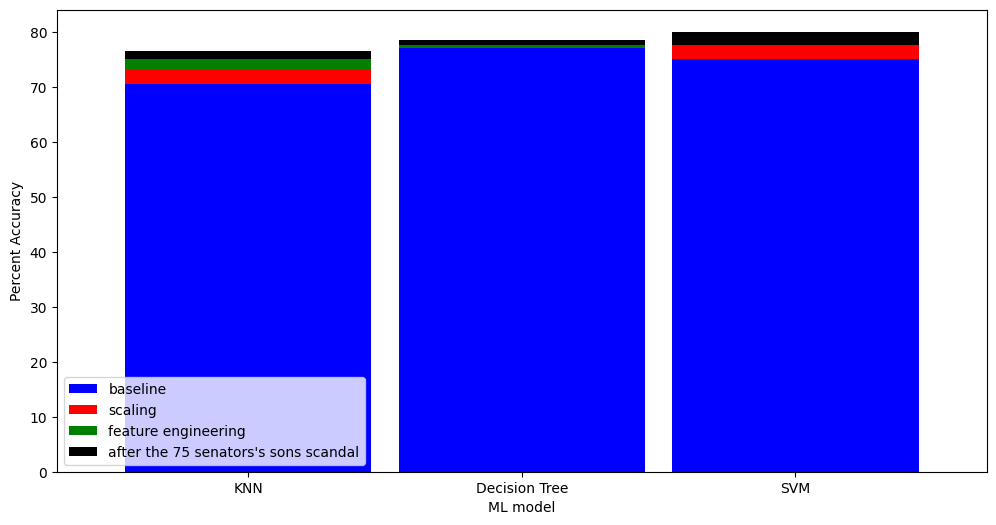

In [ ]:
chart_df = pd.DataFrame(
    {'ML model': ['KNN', 'Decision Tree', 'SVM'],
    'baseline':[70.5, 77, 75],
    'scaling':[2.5, .1, 2.5],
    'feature engineering':[2, .4, .1],
    'after the 75 senators\'s sons scandal':[1.5, 1, 2.4]
})

fig, ax = plt.subplots(figsize=(12,6))
chart_df.plot(x='ML model', rot='horizontal', ylabel='Percent Accuracy', kind='bar', width=.9, stacked=True, ax=ax, color=['blue', 'red', 'green', 'black'])
plt.show()

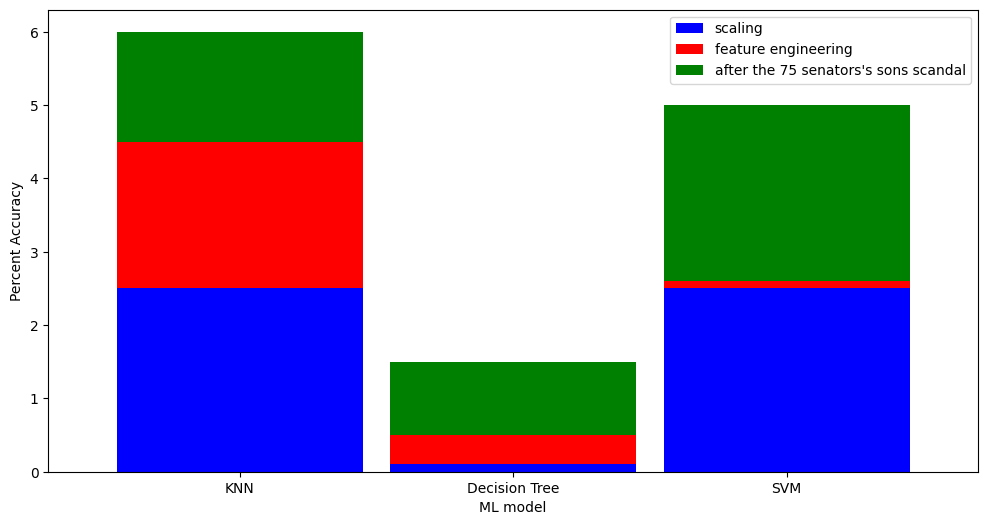

In [ ]:
chart_df = pd.DataFrame(
    {'ML model': ['KNN', 'Decision Tree', 'SVM'],
    #'baseline':[70.5, 77, 75],
    'scaling':[2.5, .1, 2.5],
    'feature engineering':[2, .4, .1],
    'after the 75 senators\'s sons scandal':[1.5, 1, 2.4]
})

fig, ax = plt.subplots(figsize=(12,6))
chart_df.plot(x='ML model', rot='horizontal', ylabel='Percent Accuracy', kind='bar', width=.9, stacked=True, ax=ax, color=['blue', 'red', 'green'])
plt.show()

# Hyperparameter Tuning the SVM Model

Let's really tune up our SVM model.  Hyperparameters, that is.

In [ ]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']
            }

grid = GridSearchCV(svm, param_grid, verbose=2)

grid.fit(X_train_normalized, y_train_normalized)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   1.6s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.5s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.4s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.01, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 1.59610314,  0.30153809,  0.84149203,  0.23093348,  0.48777924,
         0.23969345,  0.56738834,  0.37617455,  0.92794099,  0.26203971,
         0.57932758,  0.28330169,  0.63679986,  0.25536551,  0.45743465,
         0.26428165,  1.01006303,  0.77509642,  0.59590445,  0.62836556,
         0.42167878,  0.78854728,  0.34698772,  0.62048144,  1.1446691 ,
         3.91379833,  0.83398533,  4.14435043,  0.33391228,  3.97716784,
         0.47408853,  5.3087647 ,  0.94162893, 34.38882041,  1.80395374,
        56.75223951,  1.40066376, 40.79548807,  0.34175825, 33.86202679]),
 'std_fit_time': array([5.03911765e-01, 8.91307955e-02, 1.47557972e-01, 9.65851119e-03,
        1.17396841e-02, 1.93503985e-02, 2.25489470e-02, 7.58947791e-02,
        2.19042942e-01, 5.83940419e-03, 2.94890904e-02, 3.80686267e-02,
        2.10468029e-02, 8.57553627e-03, 1.78373646e-02, 1.41974000e-02,
        2.01456815e-01, 1.84604357e-01, 1.52347184e-02, 2.58498029e-02,
        1.07307896e-0

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [ ]:
grid.best_score_

0.7750745171369438

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid_svc_test_preds = grid.predict(X_test_normalized)
# I'd say I struggled most with 'backend' or 'configuration issues'
# I had a chromebook.  That seemed to complicate things.
# I never got eslint to work properly, and it kind of scarred me
# configuring Typescript, Vite, Express, GitHub, Jest always intimidated me,
# and sometimes actually stymied me for unduly-long periods of time
# it's my fault that I didn't recognize and address this more proactively
# but I am better at it now (if a bit scarred still)
print(f"Test Accuracy: {accuracy_score(y_test_normalized, grid_svc_test_preds)}")

Test Accuracy: 0.8169491525423729


Another, say 1.5% improvements from hyperparameter tuning.

In [ ]:
svc_model_best = SVC(C=100, gamma=.001, kernel='rbf', random_state=42)
svc_model_best.fit(X_train_normalized, y_train_normalized)
# it's amazing how great it feels when stuff works
# the struggle (within reason) makes it even better
# it's like the ancient Greek idea of enhancing any given emotion
# by immediately preceding it by its opposite
train_preds = svc_model_best.predict(X_train_normalized)
test_preds = svc_model_best.predict(X_test_normalized)

print(f"Train Accuracy: {accuracy_score(y_train_normalized, train_preds)}")
print(f"Test Accuracy: {accuracy_score(y_test_normalized, test_preds)}")
# thank you for this program, and your devotion to it!!!

Train Accuracy: 0.807572760666855
Test Accuracy: 0.8169491525423729


# Conclusion

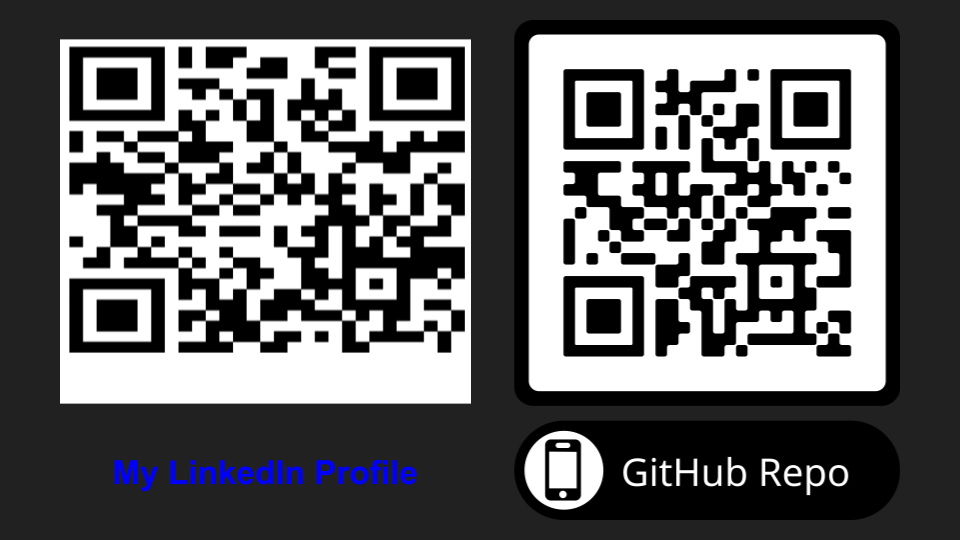